# Project 3 Report and Code Output
## By Alejandro Rigau
### April 28, 2021

# Part 1
Here I copy the code provided from the project description. I load the data into a pandas dataframe which I will use throughout the project. 

In [1]:
import pandas as pd
data = pd.read_csv("./08_gap-every-five-years.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Exercise 1
Using the matplotlib scatter funciton, I can use the life expectancy as the y axis and the years as the x axis.

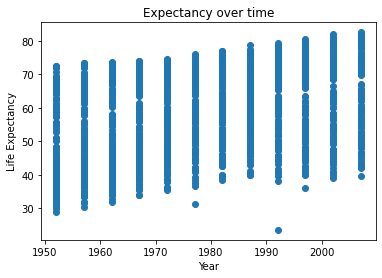

In [2]:
import matplotlib.pyplot as plt
import numpy as np

life = data['lifeExp']
year = data['year']

plt.scatter(year, life)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Expectancy over time")
plt.show()

# Question 1
According to this graph, the overall trend appears to be that the life expectancy of all countries combined is increasing. The graph shows that the increase is linear.

# Violin graph recreation
Here I create an array for each year, storing the Life Expectancy values for that year. This can be easily done with the Pandas library.

In [3]:
q1 = data.groupby('year').lifeExp.apply(list).reset_index()
q1.head()

,year,lifeExp
0,1952,"[28.801, 55.23, 43.077, 30.015, 62.485, 69.12,..."
1,1957,"[30.331999999999997, 59.28, 45.685, 31.9990000..."
2,1962,"[31.997, 64.82, 48.303000000000004, 34.0, 65.1..."
3,1967,"[34.02, 66.22, 51.407, 35.985, 65.634, 71.1, 7..."
4,1972,"[36.088, 67.69, 54.518, 37.928000000000004, 67..."


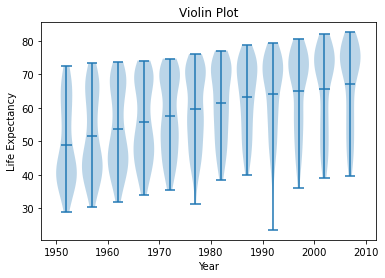

In [4]:
life_exp_per_year = q1['lifeExp']
years = q1['year']
    
plt.violinplot(life_exp_per_year,years,widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot")
plt.show()

# Question 2
We can see from this plot that the life expectancy varies greatly between countries. Most countries have a lower life expectancy in the 1950s to the mid 1960s, and then there is a shift, and most countries end up with a higher life expectancy, but a few lag behind. This means that the data is skewed downward in the early years before skewed upward in the later years. All years appear to be unimodal, with the exception of the late 1960s to the mid 1970s, which appear to be more bimodal.

# Question 3
I would reject the null hypothesis of no relationship because, based on the previous graphs we created, there does appear to be a relationship. Overall, the life expectancy increases as the years pass, indicating that there is a clear relationship between life expectancy and years. In particular, we can see that the mean of each year in our violin graph increases over time in a slightly linear fashion.

# Question 4
The residuals would only cause a transformation in the y axis but it should still keep a linear relationship. Everything would be centered around 0 but the violions would keep the same general shape. 

# Question 5
According to the assumptions of the linear regression model, the violin graph should look like the violins are centered around 0 and have the shape of a normally distribution.

# Exercise 2
Here I use the sklearn linear regression model to fit to the data. I decided to plot the line (even though it wasnt required) to show how it worked and fitted pretty accurately.

-585.6521874415445
[0.32590383]


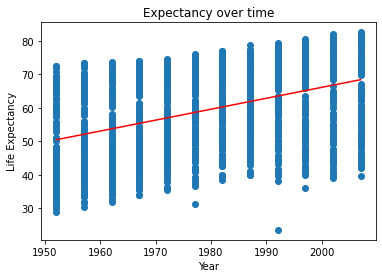

In [5]:
from sklearn.linear_model import LinearRegression

x = year.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(x, life)
y_pred = reg.predict(x)
print(reg.intercept_)
print(reg.coef_)
plt.scatter(year, life)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Expectancy over time")
plt.plot(year, y_pred, "r")
plt.show()

# Question 6
The slope of my regression line is 0.32590383 which means that life expectancy increases by 0.32590383 every year.

# Question 7 
I reject the null hypothesis of no relationship because we can see that the linear model was able to fit to the data with minimal error and obtain a significant and meaningful slope. Therefore we can conclude that this data does indeed have a linear relationship. Furthermore, I use the statmodels library to also fit the data and calculate the p-value. The calculated p-value is essentially 0 which means that our null hypothesis is rejected.

In [6]:
import statsmodels.formula.api as sm

model = sm.ols('lifeExp~year', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           7.55e-80
Time:                        23:17:35   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Exercise 3
To calculate the residuals, I subtracted the life expectancy from the regression line values (predicted y values based on X axis). I used the trained linear regression model trained in Exercise 2. I also used the same method to create the violins as in Exercise 2.

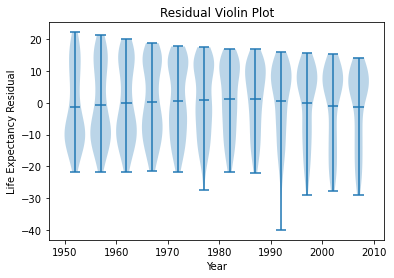

In [7]:
data["residual"] = data["lifeExp"] - y_pred
e3 = data.groupby('year').residual.apply(list).reset_index()
plt.violinplot(e3["residual"],e3["year"],widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residual")
plt.title("Residual Violin Plot")
plt.show()

# Question 8
Yes, I deducted that the results would be centered around zero, and they are. A model that is well-fitted has small, zero-centered residuals. The means of the violins are all closely centered around zero residual.

# Exercise 4
In this part I first group my data by continent using Pandas and then used the same violin plot as previous exercise.

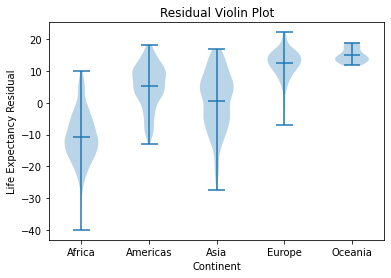

In [8]:
e4 = data.groupby('continent').residual.apply(list).reset_index()
x = range(len(e4["continent"]))
plt.violinplot(e4["residual"], x,widths=0.5,showmeans=True)
plt.xlabel("Continent")
plt.ylabel("Life Expectancy Residual")
plt.title("Residual Violin Plot")
plt.xticks(x, e4["continent"].unique())
plt.show()

# Question 9
There appears to be a link between the model residual and the continent. This is because the data from each continent reflects a significantly different level of residual, implying that some continents have more error than others. I propose running a regression analysis of life expectancy over time, focusing on one continent at a time.

# Exercise 5
I use the Seaborn library to create this graph. I could have calculated each one in a separate graph but this method seamed cleaner. lmplot takes care of generating the regression lines and correctly coloring each continent group.

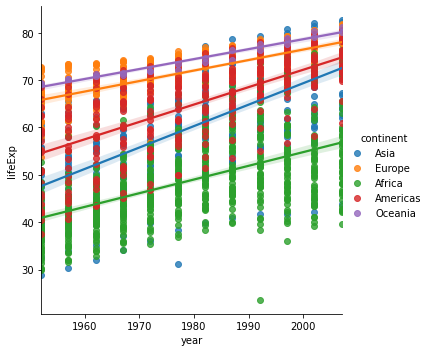

In [9]:
import seaborn as sns
sns.lmplot(data=data, x='year', y='lifeExp', hue='continent')

# Question 10
Yes, the linear regression slopes for each continent are clearly not the same. For example, the regression line for Asia is noticeably steeper than that for Oceania. We should clearly include an interaction term for continent and year to account for differences between continents and fit a more accurate model.

# Exercise 6
To finish this section, I use the statsmodels library to perform all of the calculations. I can use the lifeExpyear*continent formula. I can get the coefficients for the fitted linear regression models using life expectancy and the interaction terms between continent and year using that formula. The function also returns P values, which can be used to answer the remaining questions.

In [10]:
import statsmodels.formula.api as sm

result = sm.ols('lifeExp~year*continent', data=data).fit()
result.summary()
# result.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:17:36   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 11
To verify if the values are significantly different from 0 we have to determine if the p values < 0.05. Again, I used the statsmodel library to calculate the p values. I created a new column in the resulting table that returns a truth value if the p values are less than 0.05. The only parameters that are not significantly different from 0 are continent[T.Oceania] and year:continent[T.Oceania].

In [11]:
q11 = result.pvalues
q11 = pd.DataFrame(q11)
q11["p values < 0.05"] = q11[q11.columns[0]] < 0.05
q11

,0,p values < 0.05
Intercept,3.436134e-53,True
continent[T.Americas],1.649695e-02,True
continent[T.Asia],4.139916e-09,True
continent[T.Europe],4.051687e-03,True
continent[T.Oceania],2.872034e-01,False
year,1.953998e-62,True
year:continent[T.Americas],7.584665e-03,True
year:continent[T.Asia],1.149941e-09,True
year:continent[T.Europe],1.417280e-02,True
year:continent[T.Oceania],3.597980e-01,False


# Question 12
For this question I fit a new regression model to obtain the same coefficients used on the graph created by Seaborn. These coefficients correspond to the life expectancy increase each year for each continent.

In [12]:
e6 = data[data['continent']=="Africa"]
x = e6['year'].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, e6['lifeExp'])
y_pred = reg.predict(x)
print(f"Africa life expectancy increase per year {reg.coef_[0]}")

Africa life expectancy increase per year 0.2895292630446477


In [13]:
e6 = data[data['continent']=="Europe"]
x = e6['year'].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, e6['lifeExp'])
y_pred = reg.predict(x)
print(f"Europe life expectancy increase per year {reg.coef_[0]}")

Europe life expectancy increase per year 0.2219321445221446


In [14]:
e6 = data[data['continent']=="Asia"]
x = e6['year'].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, e6['lifeExp'])
y_pred = reg.predict(x)
print(f"Asia life expectancy increase per year {reg.coef_[0]}")

Asia life expectancy increase per year 0.4531224038991313


In [15]:
e6 = data[data['continent']=="Americas"]
x = e6['year'].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, e6['lifeExp'])
y_pred = reg.predict(x)
print(f"Americas life expectancy increase per year {reg.coef_[0]}")

Americas life expectancy increase per year 0.3676509370629371


In [16]:
e6 = data[data['continent']=="Oceania"]
x = e6['year'].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, e6['lifeExp'])
y_pred = reg.predict(x)
print(f"Oceania life expectancy increase per year {reg.coef_[0]}")

Oceania life expectancy increase per year 0.21027237762237763


# Exercise 7
Here I create the same graph as in Exercise 3 but using the residuals from the interaction model. From the graph we can see that the assumptions of the linear regression model were correct and we can see that the shape of the violins resemble a normal distribution. 

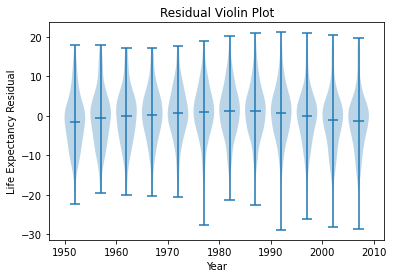

In [17]:
e7 = data
e7['residual'] = result.resid
e7 = e7.groupby('year').residual.apply(list).reset_index()
plt.violinplot(e7["residual"],e7["year"],widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residual")
plt.title("Residual Violin Plot")
plt.show()

# Part 2

In [29]:
# We could use np.dot here, but let's be explicit for clarity
def sum_of_squares(v):
    return np.sum([i * i for i in v])

# for some function, and for some input to that function, compute the difference quotient for the given `h`
def estimate_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

# for some function, and for an input vector to that function, compute the difference quotient of the _ith_
# parameter given `h`.
# Main thing is that we only 'wiggle' the input vector at the given index.
def estimate_partial(f, v, i, h):
    new_v = [val + (h if d == i else 0) for d, val in enumerate(v)]
    
    return (f(new_v) - f(v)) / h

# Getting the vector of partial derivatives is now just doing that for every index
def estimate_gradient(f, v, h):
    return [estimate_partial(f,v,i,h) for i in range(len(v))]


# A single step of Gradient Descent
# We assume that the input vector and the length of the gradient match!!!
# We also parameterize the function with a step-size
def single_step(vec, grad, ss):
    # multiply our gradient by the scalar step-size
    step = np.multiply(grad, ss)
    # add the resulting step vector to our input vector
    return vec + step



In [19]:
def estimate_linear_gradient(x, y, theta):
    m, b = theta        # slope and intercept
    y1 = m * x + b      # your high school math teacher would be proud
    
    residual = (y1 - y)        # the _residual error_ is the difference between
                               # our prediction and the value in the dataset
    #r_squared = residual ** 2  we don't actually need this, it's just here to show you
    
    # the above two lines are just an inlined version of the square loss function
    # we can cheat (by using calculus) and just use the actual derivative:
    return [2 * residual * x, 2 * residual]

# Warning I used `np.mean` below and the algorith didn't work and it took me a _long_
# time to figure out that the bug was that I assumed it was a vector mean
# Also note that I would have found the bug way sooner had I actually asserted something
# I said above and made sure that the gradient and the input vector were the same shape!
# All that said, here's an actual vector mean
def v_sum(vs):
    return np.array([sum(v[i] for v in vs) for i in range(len(vs[0]))])

def v_mean(vs):
    return np.multiply(v_sum(vs), 1/len(vs))

# A linear relationship between `x` and `y`.
m = 42
b = 7
linear_rel = [(x, m * x + b) for x in range(-50, 50)]

# a random starting vector for the model we want to train
start_theta = [np.random.uniform(-1,1), np.random.uniform(-1,1)]

step_size = 0.001

theta = start_theta
for e in range(5000):
    predictions  = [estimate_linear_gradient(x, y, theta) for x, y in linear_rel]
    mse_gradient = v_mean(predictions)
    theta        = single_step(theta, mse_gradient, -step_size)
    
    
def is_close(a,b):
    return (a - 0.01) < b < (a + 0.01)

s, i = theta
if is_close(m,s) and is_close(b,i):
    print("we got close!")
else:
    print("we got so far!")

we got close!


In [34]:
# A linear relationship between `x` and `y`. (same as before)
m = 42
b = 7
r = range(-50, 50)
ind = [ [i] for i in r] # notice this is a list of lists,
                        # the inner list length is the dimensionality
dep = [m * x + b for x in r]

In [35]:
print(s)
print(i)

41.99999980935795
6.999682580881453


In [36]:
m = s
b = i
y_pred = [m * x + b for x in dep]

Text(0.5, 1.0, 'A Linear Regression')

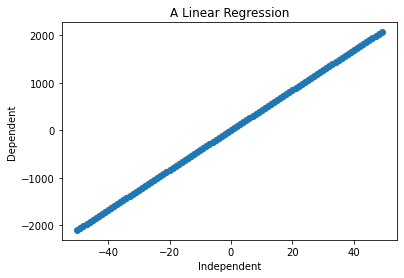

In [39]:
fig, ax = plt.subplots()
    
ax.scatter(ind, dep)
ax.set_xlabel("Independent")
ax.set_ylabel("Dependent")
ax.set_title("A Linear Regression")
    
# ax.plot(dep, y_pred, color='red')

In [24]:
from sklearn import datasets
# Generate data for linear regression:
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

In [42]:
gen_data_x

array([[-1.66264174,  1.1555681 , -0.79280976, ..., -1.27938095,
         0.7923663 ,  0.02889449],
       [-0.20564549,  0.29158332, -0.76027906, ..., -0.83860962,
        -0.5491816 , -1.31733806],
       [ 2.5709363 ,  0.9827601 ,  0.84416185, ...,  0.7603954 ,
         0.38584714,  0.26230707],
       ...,
       [-0.23248874,  0.18901171,  0.38306488, ...,  0.09261568,
        -0.03957185,  0.44729827],
       [ 0.53444837,  1.51344558,  0.15770037, ..., -0.35396654,
         0.14351734, -0.70631728],
       [-0.7414061 , -0.24993115, -1.13379909, ..., -0.10546359,
         0.72511299,  1.2794187 ]])